In [248]:
#Importing required libraries
import pandas as pd
import numpy as np
import re
from sklearn.tree import export_graphviz
import graphviz
import os
import seaborn as sns
import nltk
import csv
from sklearn import tree
from sklearn import ensemble
from ipywidgets import Image
from io import StringIO
import pydotplus
from sklearn.tree import export_graphviz
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix as cm
import tokenizers
from keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
# pd.options.display.max_colwidth = 8000

In [249]:
data = pd.read_csv('3000tweet.csv', sep= ';', encoding='utf-8')
df = pd.DataFrame(data)
df = np.array(df)

nltk.download('stopwords')
stop_word_list = stopwords.words('turkish')

[nltk_data] Downloading package stopwords to C:\Users\Ahmet
[nltk_data]     KAÇAN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [250]:
# data = data.dropna().reset_index(drop=True)
data.dropna().reset_index(drop=True)
data.isnull().sum()

Tweets    0
Status    0
dtype: int64

In [251]:
def preprocess_text(conv):

    sentence = re.sub('[\d\s]', ' ', str(conv))
    sentence = re.sub('[^\w\s]', ' ', str(sentence))
    sentence = re.sub(r'\s+', ' ', sentence)
    sentence = re.sub(r"\b[\w\s]\b", ' ',str(sentence))
        
    WPT = nltk.WordPunctTokenizer()
    tokens = WPT.tokenize(sentence)
    filtered_tokens = [token for token in tokens if token not in stop_word_list]
    single_doc = ' '.join(filtered_tokens)
    
    return single_doc.lower()

In [252]:
y=[doc for doc in data.iloc[:,1]]
# Y = data['Status']
X = data['Tweets']
X = X.apply(preprocess_text)
pd.DataFrame(data = X)

#pd.DataFrame(data = Y)

,Tweets
0,dun turkcelle tepkilerimizden sonra bugün turk...
1,girmezmiyim turkcell kartim bile var yarindan ...
2,tam tünelden gecerken cekiyordu türkcell in re...
3,turkcell superonline fiber internet adsl sabit...
4,bence gnçtrkcll ark winterfest olur gelir
...,...
2994,evet kesinlikle turkcell konuda an uygun değil...
2995,selocan nedir abicim
2996,özturkcell dönücz korkuyorum çanakkale holding...
2997,turkcell se yi ara puk kodunu ogrenme menusund...


In [253]:
words = []
for i in X:
    words.append(i.split())

print(words[0])

['dun', 'turkcelle', 'tepkilerimizden', 'sonra', 'bugün', 'turkcell', 'twittera', 'sponsor', 'olmuş', 'ne', 'tesadüf', 'değil', 'mi']


In [254]:
tokenizer_obj = Tokenizer()
tokenizer_obj.fit_on_texts(X)
X = tokenizer_obj.texts_to_sequences(X)
X = pad_sequences(X)

In [255]:
scaler = StandardScaler()
X= scaler.fit_transform(X)

In [256]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0) # 80% training and 20% test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state = 10) # 50% training and 50% test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state = 100) # 20% training and 80% test

print(X_train)

[[-0.01831937 -0.02299088 -0.03349782 ...  1.43925838 -0.0594231
  -0.82926928]
 [-0.01831937 -0.02299088 -0.03349782 ... -0.71404502 -0.03232506
  -0.83761917]
 [-0.01831937 -0.02299088 -0.03349782 ...  0.71290624  0.5666256
  -0.70151605]
 ...
 [-0.01831937 -0.02299088 -0.03349782 ... -0.57006224 -0.10384155
   1.32834086]
 [-0.01831937 -0.02299088 -0.03349782 ... -0.56801371 -0.78576251
  -0.56123799]
 [-0.01831937 -0.02299088 -0.03349782 ... -0.57035489  0.06684821
  -0.84040246]]


In [257]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=10, random_state=0)
clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [258]:
accuracy=metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy)

Doğruluk: 0.83


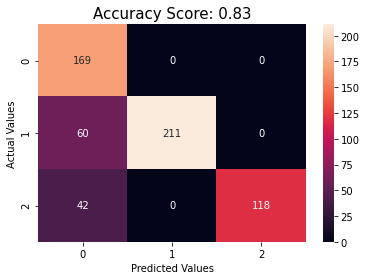

In [259]:
predictions = clf.predict(X_test)
score = round(accuracy_score(y_test, predictions), 3)
cm1 = cm(y_test, predictions)
sns.heatmap(cm1, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()

In [260]:
print(classification_report(y_test, predictions, target_names=['<50%', '=50%', '>50%']))

precision    recall  f1-score   support

        <50%       0.62      1.00      0.77       169
        =50%       1.00      0.78      0.88       271
        >50%       1.00      0.74      0.85       160

    accuracy                           0.83       600
   macro avg       0.87      0.84      0.83       600
weighted avg       0.89      0.83      0.84       600



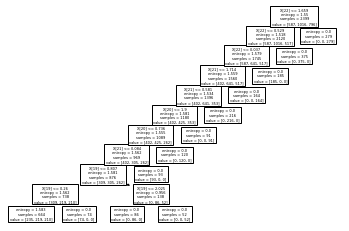

In [261]:
tree.plot_tree(clf);